# Project 2 on Logistic Regression

Problem Statement : Based on the Pima Indians Historical diabetes data, Build a machine Learning Binary classification Model to predict if the person is diabetic or not based on below features;
* Pragnancies
* Glucose
* Blood Pressure
* Skin Thickness
* Insulin
* BMI
* Diabetes Pedigree Function
* Age

Label;
* Outcome

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data=pd.read_csv(r'C:\Users\joshi\Downloads\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#data shape
data.shape

(768, 9)

In [4]:
#data statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems there's no missing values in our data. Great, Let's work on Data Processing.

# Data Processing Steps

1) Data Cleaning

2) EDA (Analysis)

3) Finding and Treating Outliers (if any)

4) Feature selection for model building

5) Data Standardization

As we can see there are values for Glucose, Blood Pressure, Skin Thickness, Insulin and BMI are 0. That's not possible. Let's deal with that. We can either remove them or just replace them with their respective mean. Let's do the latter.	

In [5]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


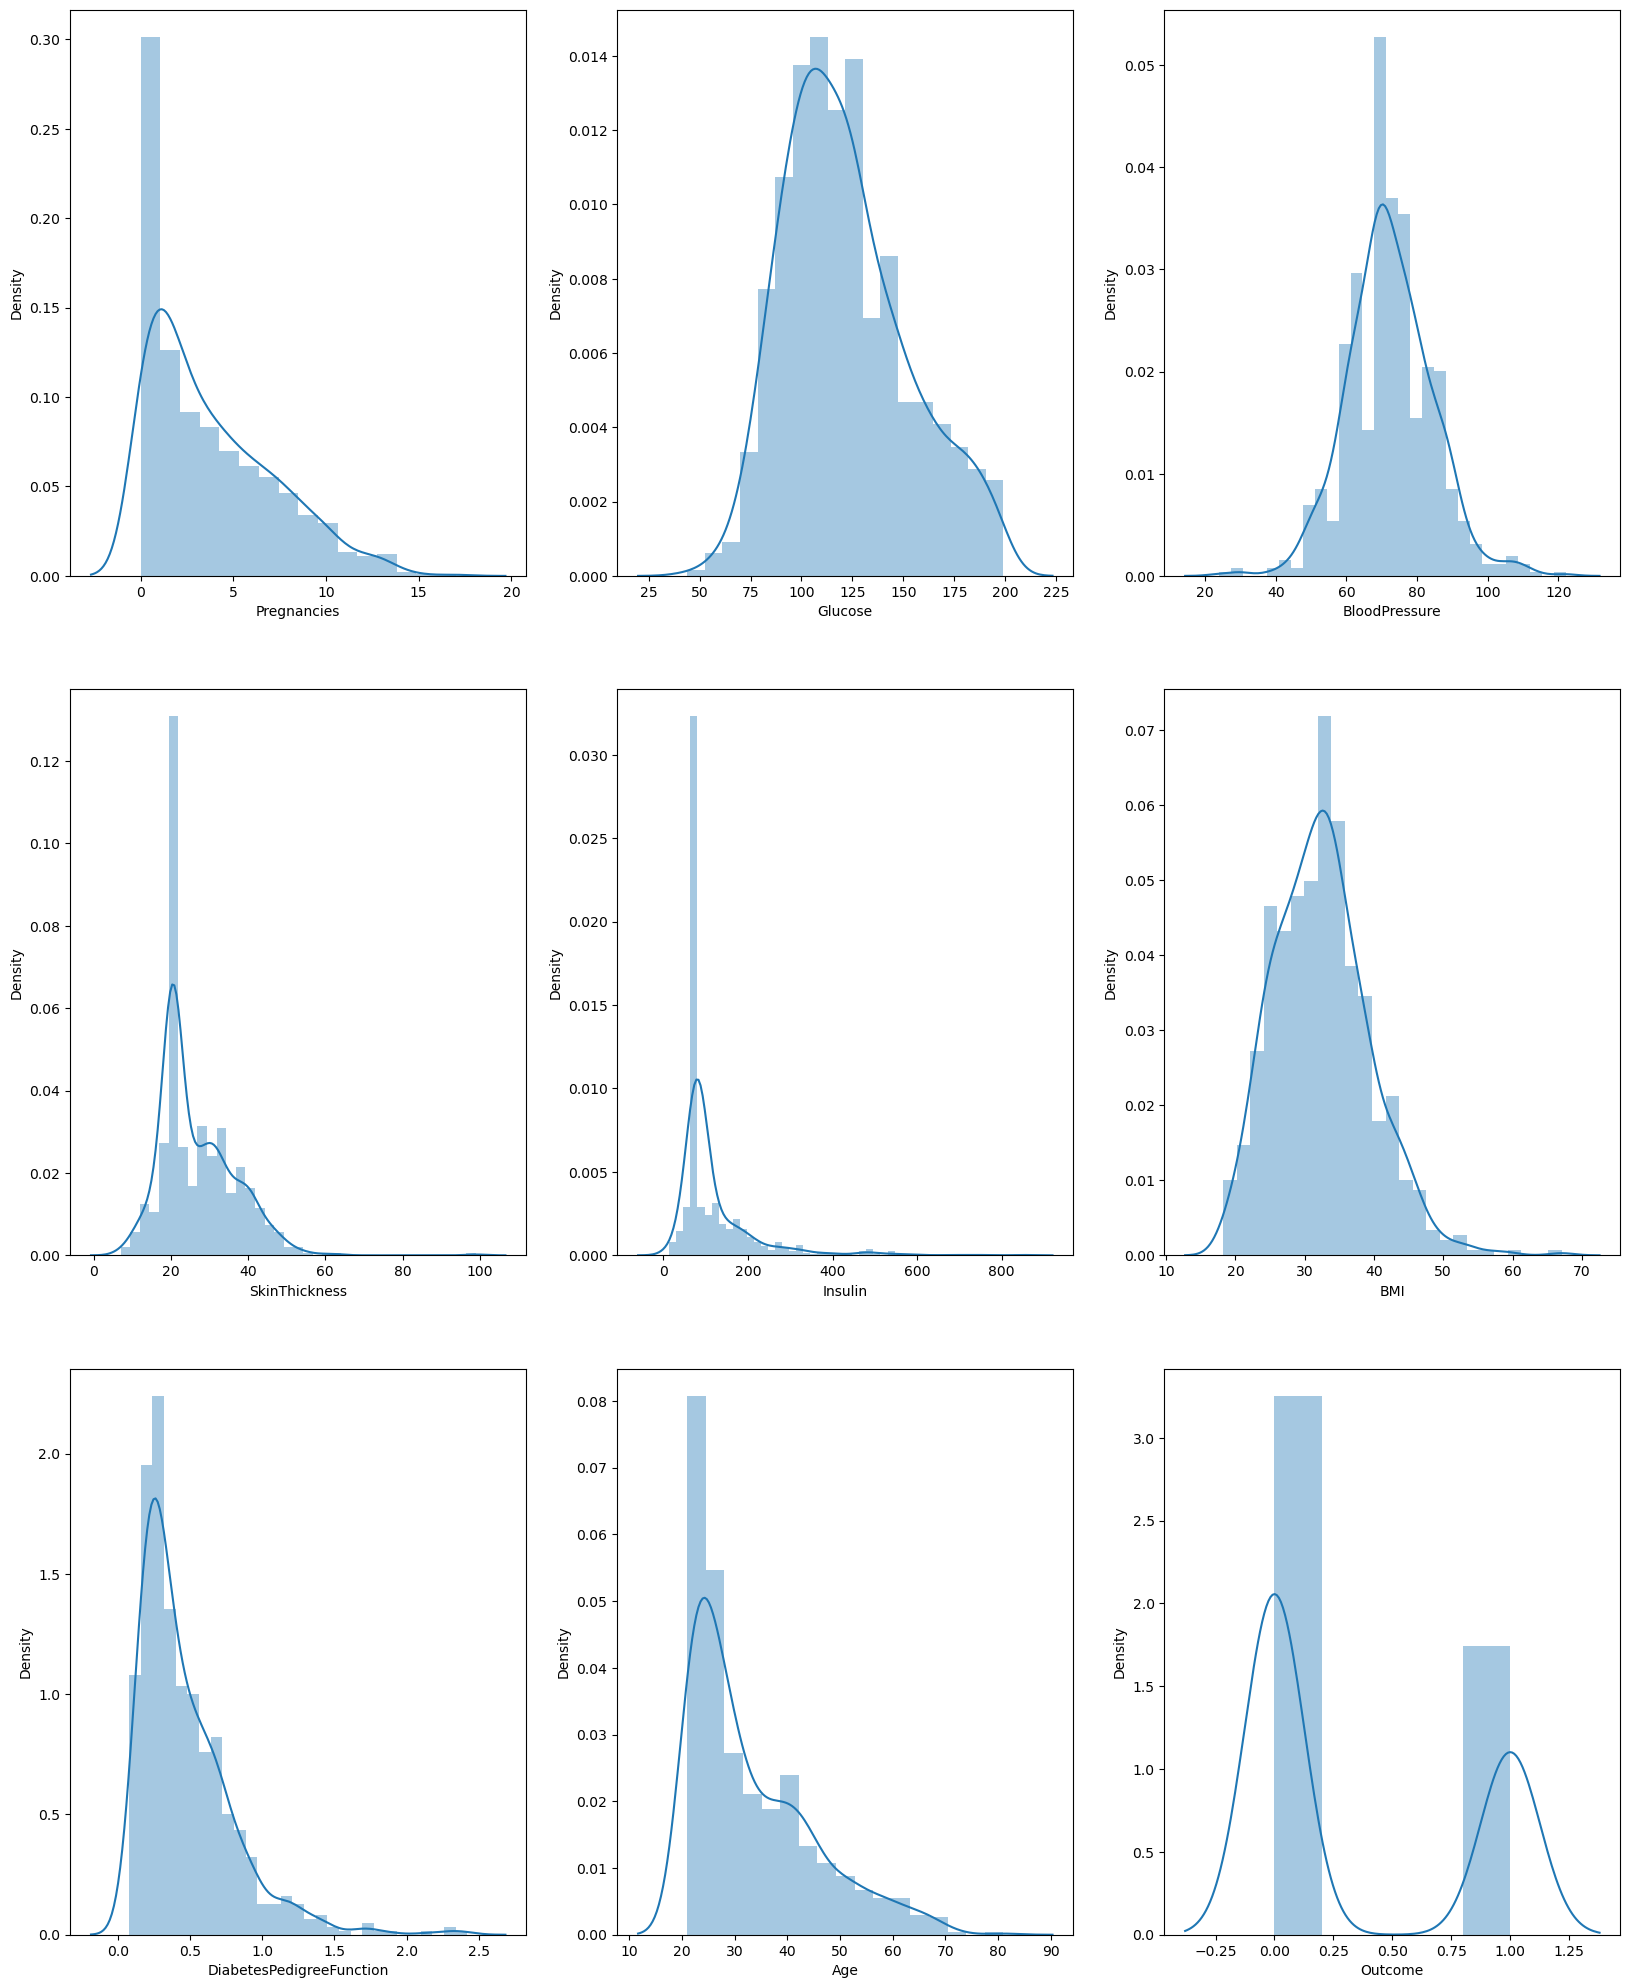

In [7]:
#let's see how the data is distributed for every column
plt.figure(figsize=(20, 25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

We can see there's some skewness in the data. Let's deal with that.

Also it can be seen that there are outliers in the data, we have to deal with them too.

In [8]:
#again looking at the shape
data.shape

(768, 9)

In [9]:
#bifurcating the feature
df_features=data.drop('Outcome', axis=1)

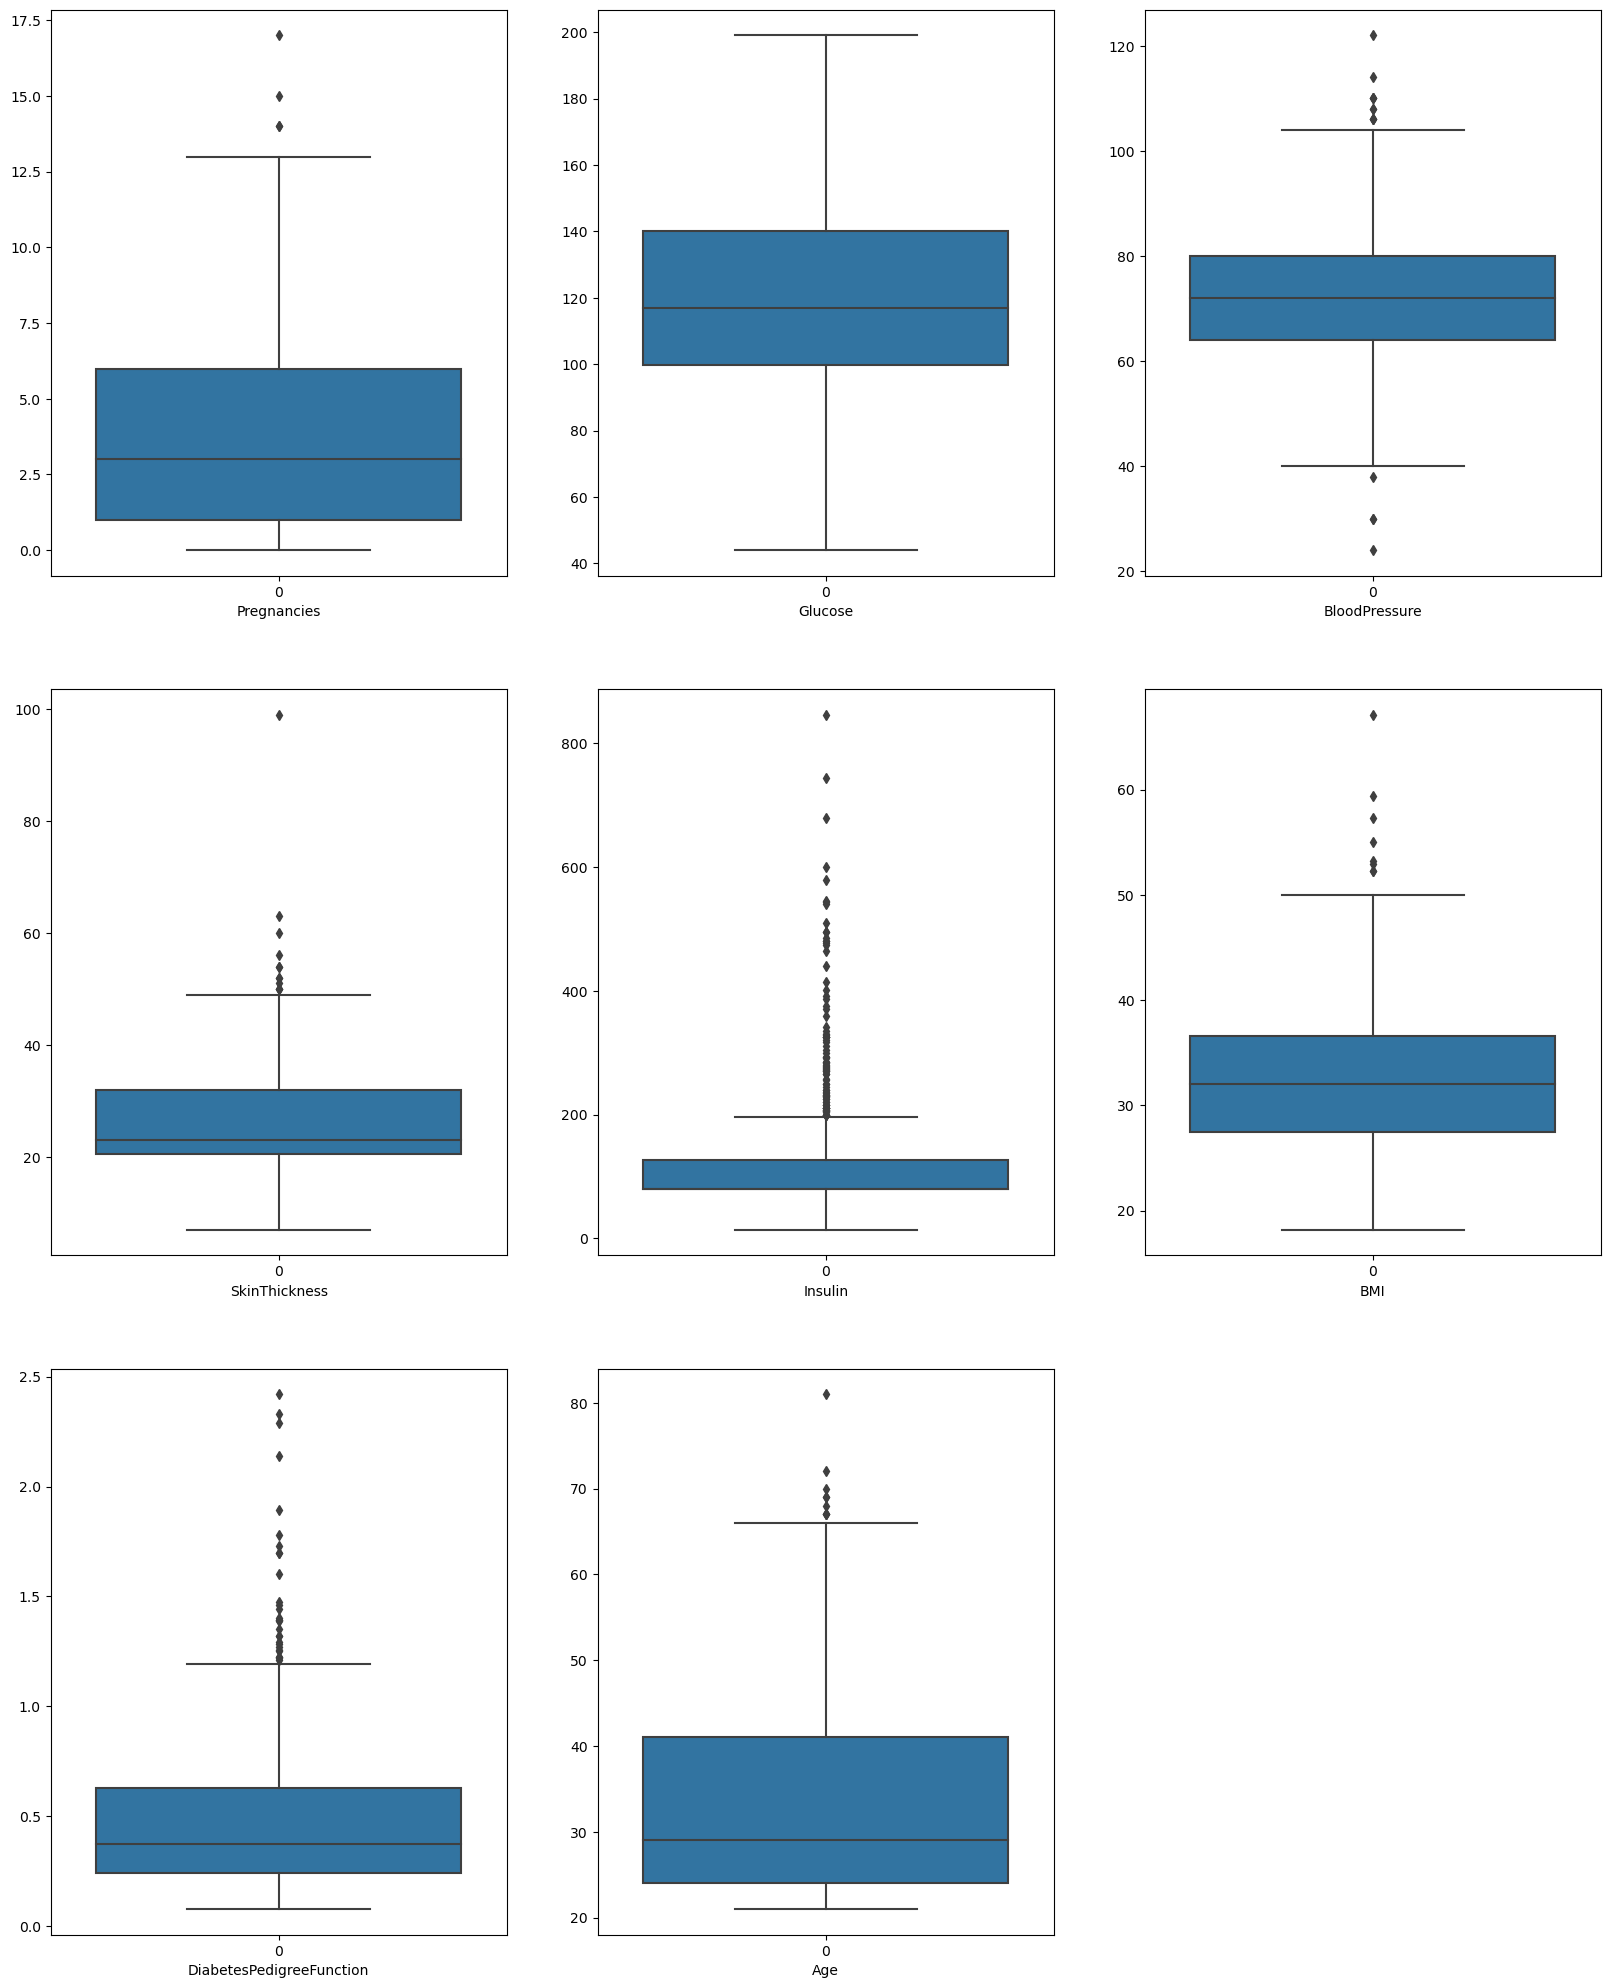

In [10]:
plt.figure(figsize=(20,25))
graph=1
for column in df_features:
    if graph<=9:
        plt.subplot(3, 3, graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column)
    graph+=1
plt.show()

In [11]:
#Finding the IQR(inter quantile range) to identify the outliers
#first quantile
q1=data.quantile(0.25)
#third quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1

In [12]:
q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

Outlier detection formula :
Higher side = Q3+(1.5 * IQR) and 
lower side = Q1-(1.5 * IQR)

In [13]:
#validating one outlier
preg_high=(q3.Pregnancies+1.5*iqr.Pregnancies)
preg_high

13.5

In [14]:
#checking the indices which have higher values
np_index=np.where(data['Pregnancies']>preg_high)
np_index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
#dropping the indices which we found in above cell
data=data.drop(data.index[np_index])
data.shape

(764, 9)

In [16]:
#reseting the index
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


# Deleting the outliers:

In [17]:
st_high=(q3.SkinThickness+1.5*iqr.SkinThickness)
print(st_high)
index=np.where(data['SkinThickness']>st_high)
print(index)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

49.1953125
(array([ 57,  86,  98, 119, 149, 209, 271, 273, 442, 528, 575, 587],
      dtype=int64),)
(752, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
747,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
748,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
749,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
750,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
insulin_high=(q3.Insulin+1.5*iqr.Insulin)
print(insulin_high)
index=np.where(data['Insulin']>insulin_high)
print(index)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

198.42578125
(array([  8,  13,  16,  20,  31,  39,  43,  53,  54,  56,  72,  92, 107,
       127, 134, 139, 147, 155, 179, 188, 192, 199, 207, 212, 220, 223,
       239, 240, 246, 250, 269, 276, 277, 286, 287, 298, 309, 324, 348,
       349, 353, 359, 364, 377, 381, 384, 398, 401, 404, 413, 414, 440,
       445, 467, 472, 473, 474, 498, 506, 524, 526, 531, 532, 541, 547,
       560, 569, 578, 590, 592, 596, 629, 639, 641, 646, 657, 663, 669,
       679, 684, 691, 694, 697, 699, 705, 732, 737], dtype=int64),)
(665, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
660,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
661,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
662,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
663,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
bmi_high=(q3.BMI+1.5*iqr.BMI)
print(bmi_high)
index=np.where(data['BMI']>bmi_high)
print(index)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

50.25
(array([107, 152, 167, 257], dtype=int64),)
(661, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
656,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
657,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
658,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
659,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
dpf_high=(q3.DiabetesPedigreeFunction+1.5*iqr.DiabetesPedigreeFunction)
print(dpf_high)
index=np.where(data['DiabetesPedigreeFunction']>dpf_high)
print(index)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.2
(array([  4,  11,  38,  47,  84, 125, 159, 184, 206, 208, 218, 246, 258,
       278, 314, 325, 457, 506, 527, 530, 531, 565, 567], dtype=int64),)
(638, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
633,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
634,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
635,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
636,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
age_high=(q3.Age+1.5*iqr.Age)
print(age_high)
index=np.where(data['Age']>age_high)
print(index)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

66.5
(array([100, 294, 369, 373, 399, 443, 548, 555, 564], dtype=int64),)
(629, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
624,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
625,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
626,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
627,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


We have to eleminate the lower outliers of Blood Pressure also.

In [22]:
bp_low=(q1.BloodPressure-1.5*iqr.BloodPressure)
print(bp_low)
index=np.where(data['BloodPressure']<bp_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

40.0
(626, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
621,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
622,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
623,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
624,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


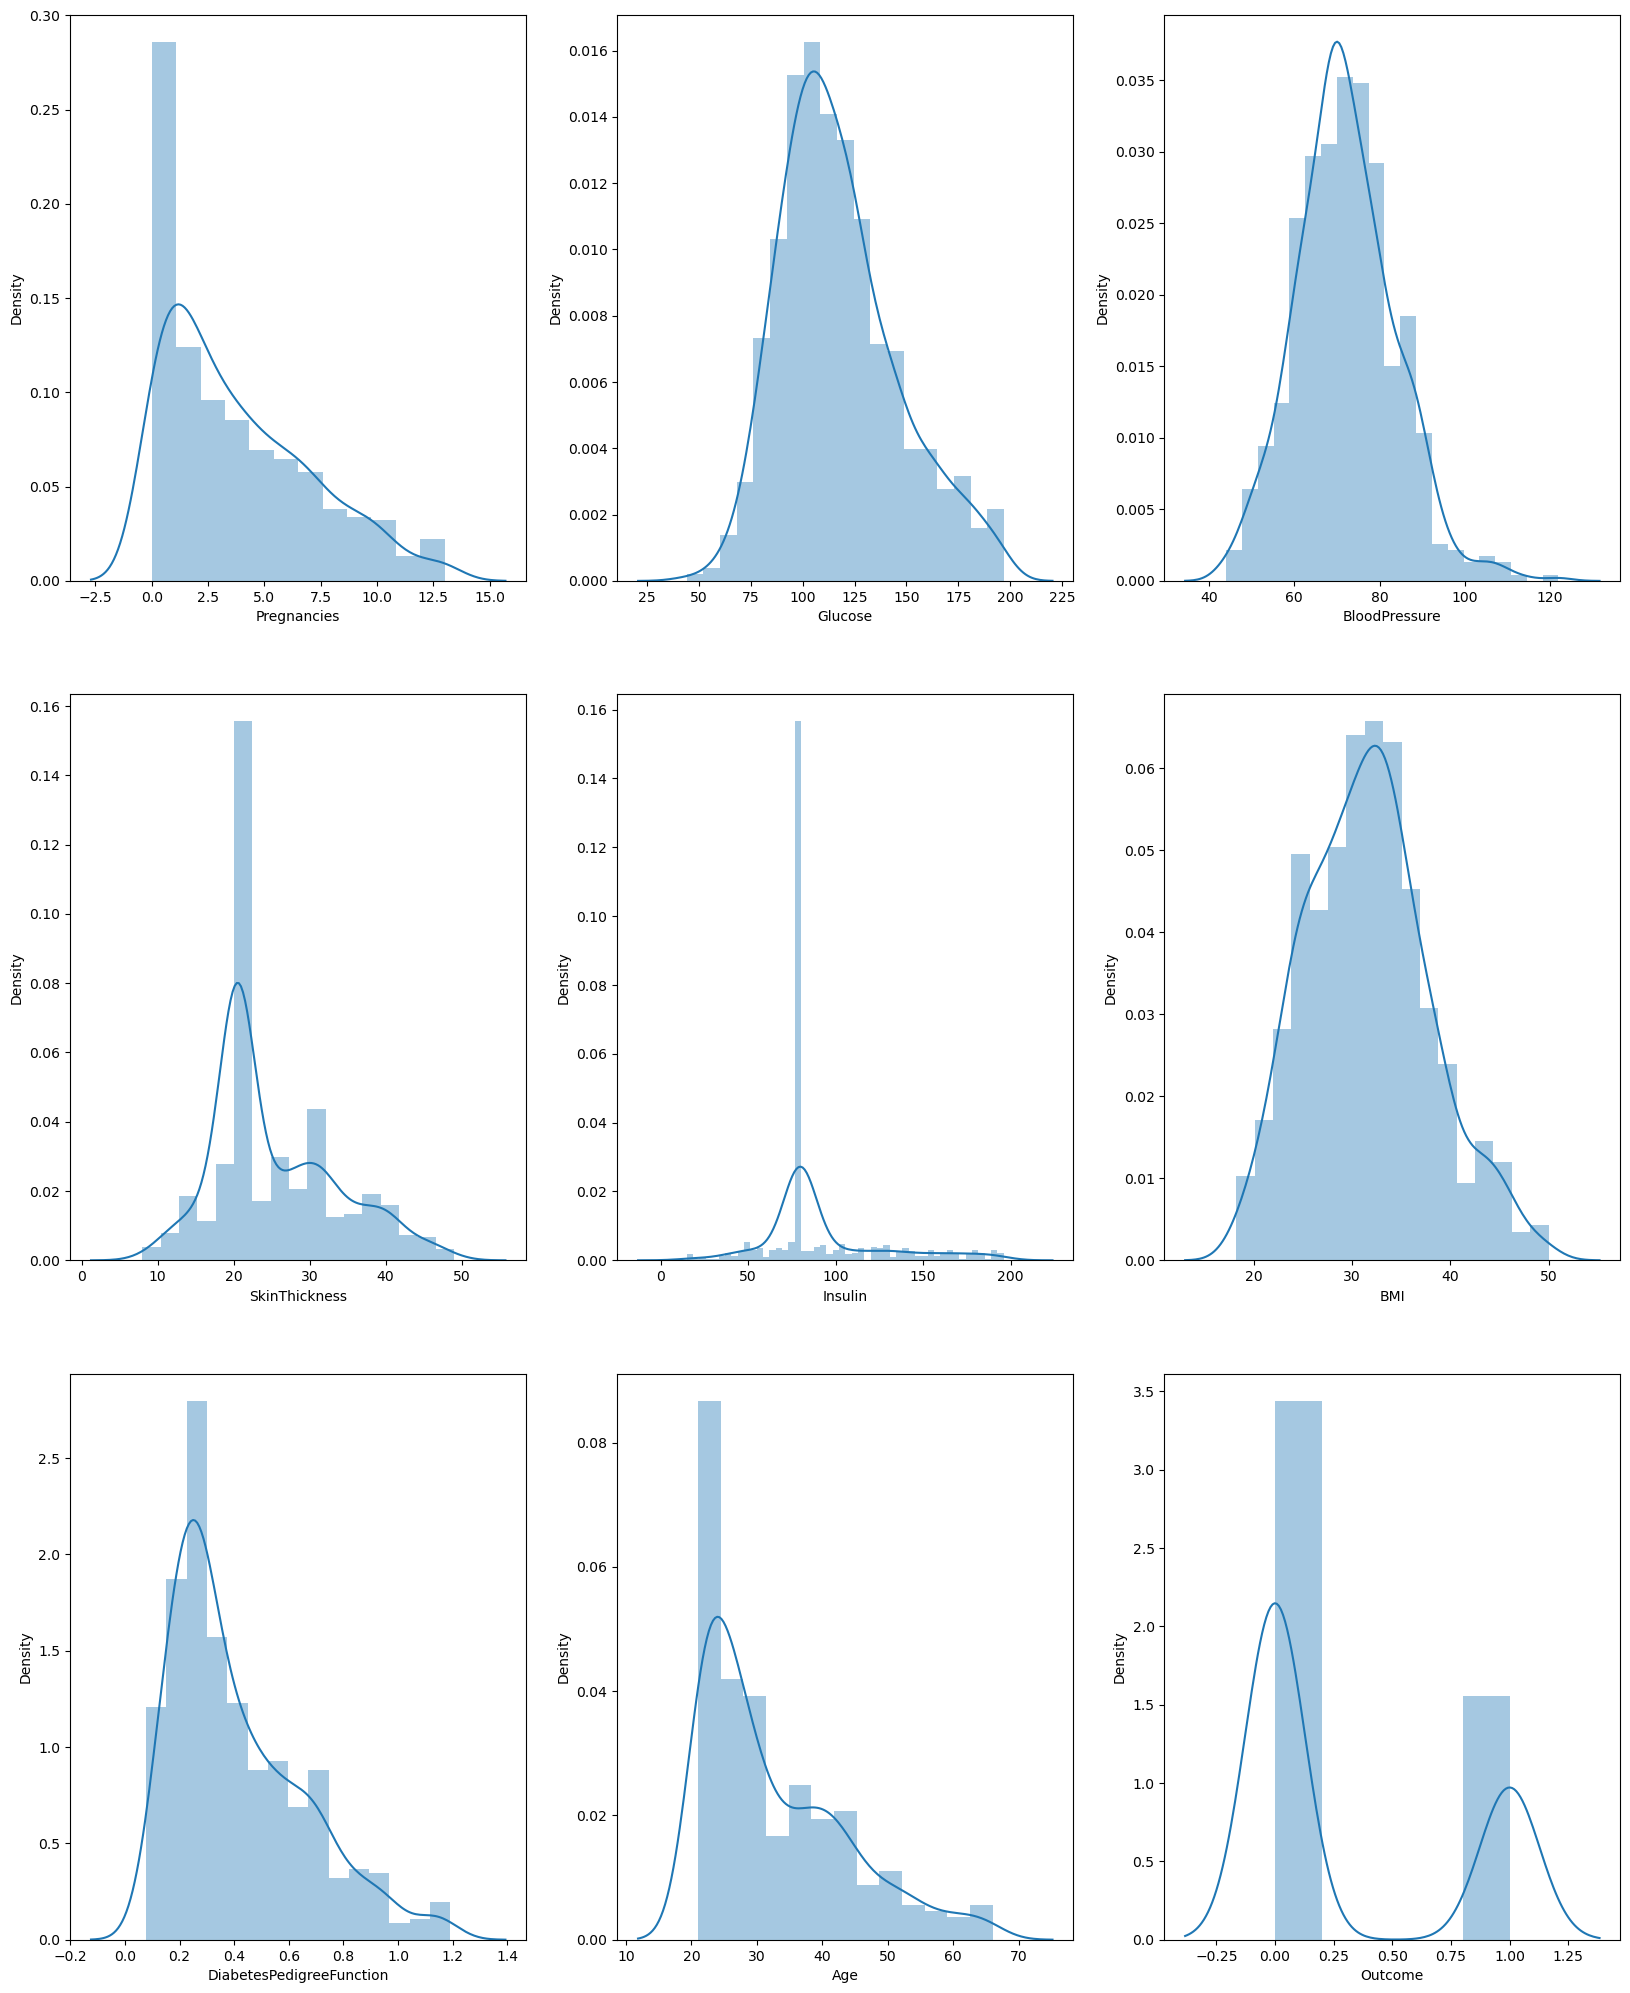

In [23]:
#ploting again to see the data
plt.figure(figsize=(20, 25))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

The data looks so much better than before. Now we can start our analysis with this data as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

Finding relationship, We want to keep only those features which have relationship with the label.

In [24]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

Before we fit our data to a model, let's look at the relationship between our independent variables and the categories.

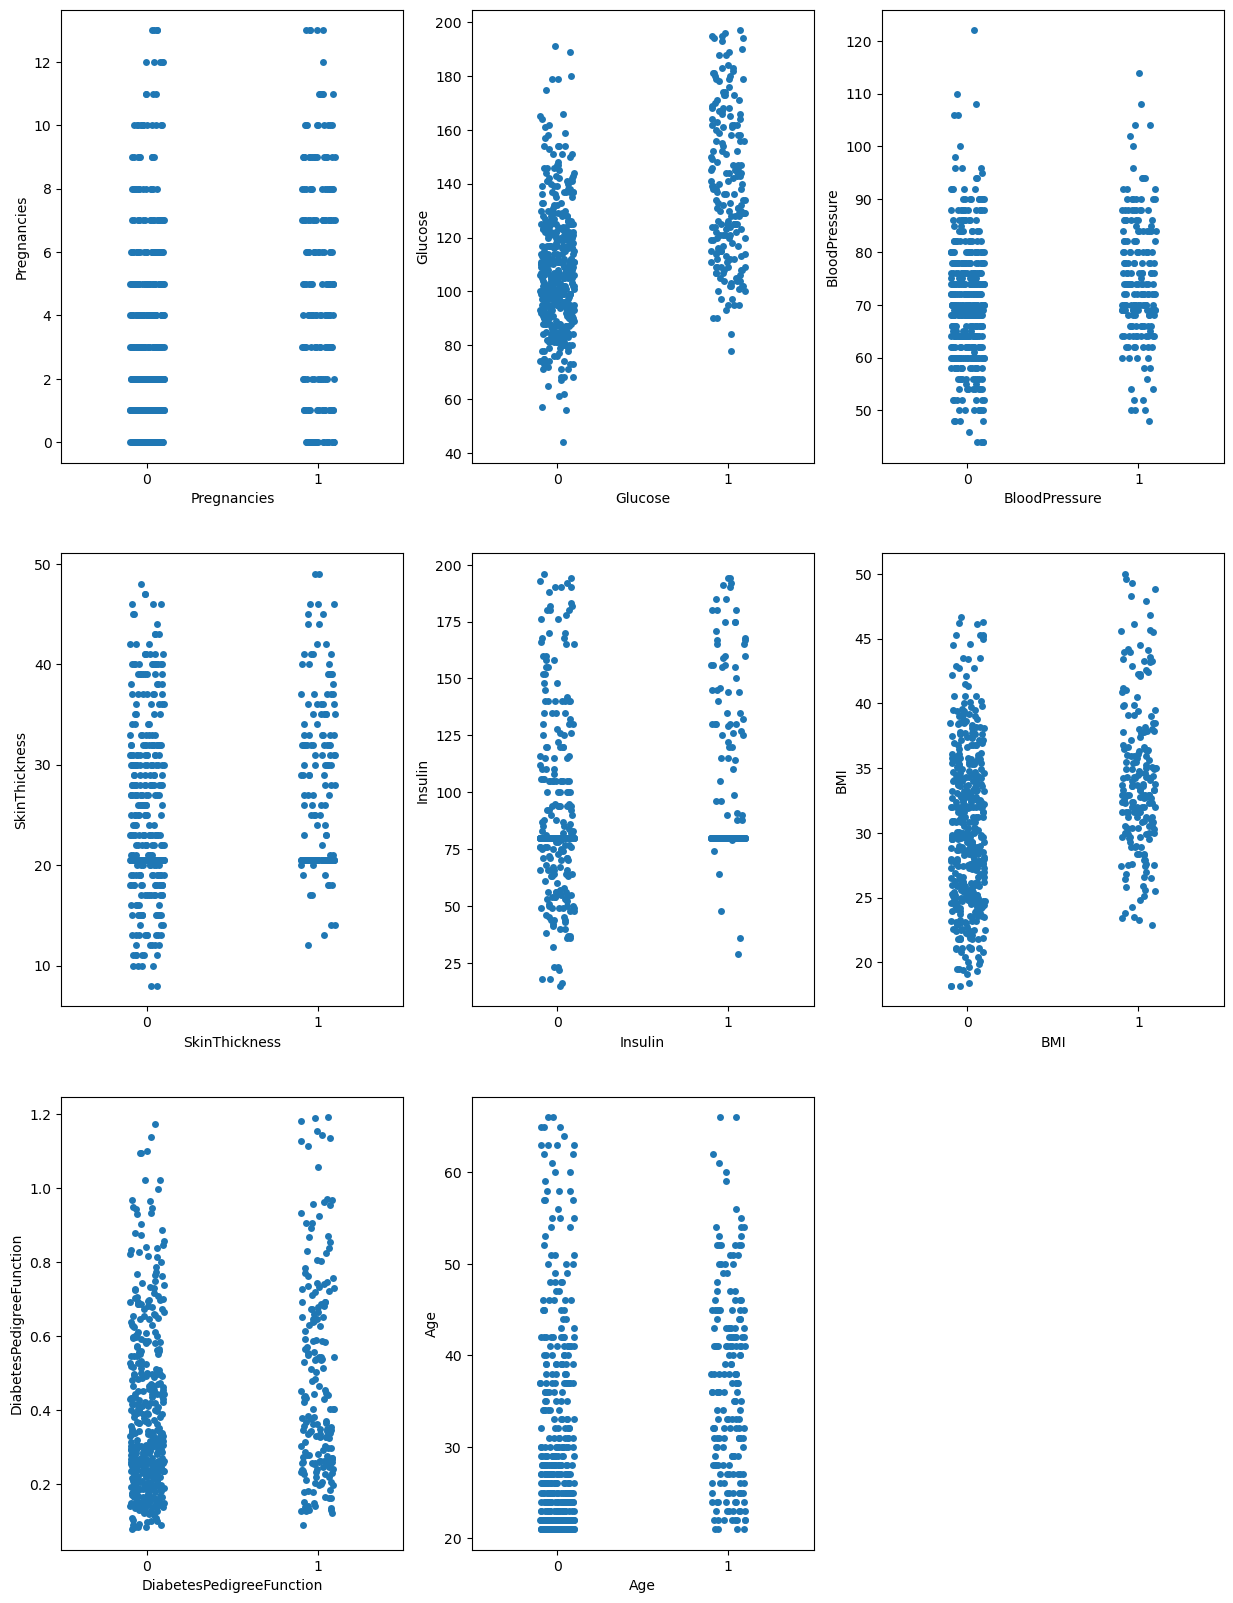

In [25]:
#let's see how feature is related to the class
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=x[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Great! let's proceed by checking multicolinearity in the dependent variables. Using the Standard Scaler for that.

In [26]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

Now we will be checking the multicolinearity by VIF(Variance Inflation Factor).

In [27]:
x_scaled.shape[1]

8

Finding VIF in each scaled column i.e x_scaled.shape[1] (1/1-R2)

In [28]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.454668,Pregnancies
1,1.242146,Glucose
2,1.270543,BloodPressure
3,1.391958,SkinThickness
4,1.201660,Insulin
5,1.433794,BMI
6,1.038000,DiabetesPedigreeFunction
7,1.660722,Age


All the VIF values are less than 5 and very low. That means no Multicolinearity exists. Now we can proceed to Train Test Split.

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=355)

# Pre Processing steps completed

Model Building

In [30]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

Let's see how well our model performs on the test Dataset.

In [31]:
y_pred=log_reg.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [33]:
log_reg.predict_proba(x_test)

array([[0.92105656, 0.07894344],
       [0.76931004, 0.23068996],
       [0.85120568, 0.14879432],
       [0.44164886, 0.55835114],
       [0.68377686, 0.31622314],
       [0.61223771, 0.38776229],
       [0.96538837, 0.03461163],
       [0.96236872, 0.03763128],
       [0.73560006, 0.26439994],
       [0.59092403, 0.40907597],
       [0.33641743, 0.66358257],
       [0.02468227, 0.97531773],
       [0.7156219 , 0.2843781 ],
       [0.97063843, 0.02936157],
       [0.65151454, 0.34848546],
       [0.15766686, 0.84233314],
       [0.90911936, 0.09088064],
       [0.93893274, 0.06106726],
       [0.8864498 , 0.1135502 ],
       [0.22982842, 0.77017158],
       [0.75831315, 0.24168685],
       [0.63439057, 0.36560943],
       [0.63554688, 0.36445312],
       [0.03373865, 0.96626135],
       [0.85610205, 0.14389795],
       [0.6235204 , 0.3764796 ],
       [0.23590431, 0.76409569],
       [0.52697562, 0.47302438],
       [0.73615145, 0.26384855],
       [0.95944243, 0.04055757],
       [0.

Confusion Matrix

In [34]:
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[100,  10],
       [ 18,  29]], dtype=int64)

Model Accuracy

In [35]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.821656050955414

Classification Report

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.74      0.62      0.67        47

    accuracy                           0.82       157
   macro avg       0.80      0.76      0.78       157
weighted avg       0.82      0.82      0.82       157



ROC(Reciever Operating Characteristics) curve

In [37]:
fpr, tpr, threshold=roc_curve(y_test, y_pred)

In [38]:
print('Threshold=', threshold)
print('fpr=', fpr)
print('tpr=', tpr)

Threshold= [inf  1.  0.]
fpr= [0.         0.09090909 1.        ]
tpr= [0.         0.61702128 1.        ]


Threshold[0] means no instances predicted (it should be read from zero to max)

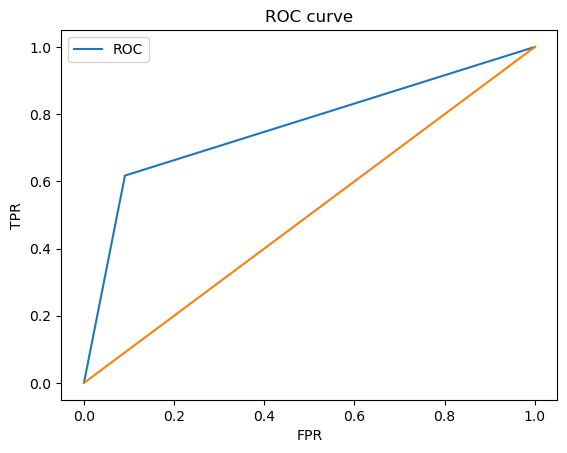

In [39]:
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1],[0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [40]:
#the area AUC is covering
auc_score=roc_auc_score(y_test, y_pred)
auc_score

0.763056092843327

we're done here!